# Support Vector Machines (SVM) to classify sentiments toward the COVID-19 pandemic (using Twitter data)

In [1]:
!pip install nltk

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import nltk
from nltk.corpus import stopwords
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
from sklearn.preprocessing import LabelBinarizer


In [4]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91799\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
data=pd.read_csv(r"D:\DUK\sem-3\deep learning\assignment-2\COVIDSenti-A.csv")

In [6]:
data

,tweet,label
0,Coronavirus | Human Coronavirus Types | CDC ht...,neu
1,"@shehryar_taseer That‚Äôs üíØ true , \nCorona...",neu
2,"TLDR: Not SARS, possibly new coronavirus. Diff...",neg
3,Disease outbreak news from the WHO: Middle Eas...,neu
4,China - Media: WSJ says sources tell them myst...,neu
...,...,...
29995,CDC: Re-test confirms Westerdam cruise ship pa...,neu
29996,Two doctors die of coronavirus within 24 hours...,neu
29997,BEIJING - The lockdown of Guo Jing's neighbour...,neu
29998,#CoronavirusOutbreak in #Balochistan !!\n#CPEC...,neu


In [7]:
data.head()

,tweet,label
0,Coronavirus | Human Coronavirus Types | CDC ht...,neu
1,"@shehryar_taseer That‚Äôs üíØ true , \nCorona...",neu
2,"TLDR: Not SARS, possibly new coronavirus. Diff...",neg
3,Disease outbreak news from the WHO: Middle Eas...,neu
4,China - Media: WSJ says sources tell them myst...,neu


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   30000 non-null  object
 1   label   30000 non-null  object
dtypes: object(2)
memory usage: 468.9+ KB


In [9]:
data.isnull().sum()

tweet    0
label    0
dtype: int64

In [10]:
data.describe()

,tweet,label
count,30000,30000
unique,29987,3
top,Copper price and coronavirus: ‚ÄúBlack swan li...,neu
freq,3,22949


In [11]:

data['label'].value_counts()

neu    22949
neg     5083
pos     1968
Name: label, dtype: int64

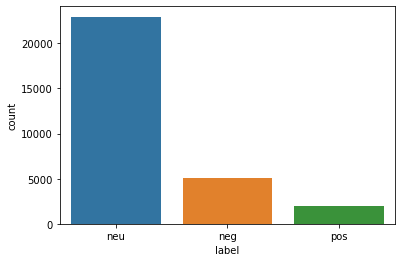

In [12]:
sns.countplot(x="label", data=data)
plt.show()
     

In [13]:

# setting the stopwords
stop_words = set(stopwords.words('english'))

Cleaning data

In [14]:
def preprocess_text(tweet):
    # Remove punctuation
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))
   
    
    # Convert to lowercase
    tweet = tweet.lower()
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = tweet.split()
    tweet = [token for token in tokens if token not in stop_words]
    tweet = ' '.join(tweet)
    
    # Apply stemming or lemmatization
    stemmer = PorterStemmer()
    tweet = stemmer.stem(tweet)
    
    return tweet

In [15]:
data1=pd.read_csv(r"D:\DUK\sem-3\deep learning\assignment-2\COVIDSenti-A.csv")



In [16]:
data1['tweet'] = data1['tweet'].apply(preprocess_text)
data1

,tweet,label
0,coronavirus human coronavirus types cdc httpst...,neu
1,shehryartaseer that‚äôs üíø true corona virus...,neu
2,tldr sars possibly new coronavirus difficult c...,neg
3,disease outbreak news middle east respiratory ...,neu
4,china media wsj says sources tell mystery pneu...,neu
...,...,...
29995,cdc retest confirms westerdam cruise ship pass...,neu
29996,two doctors die coronavirus within 24 hours ch...,neu
29997,beijing lockdown guo jings neighbourhood wuhan...,neu
29998,coronavirusoutbreak balochistan cpec route spr...,neu


In [17]:
#dependent and indepent variables
x=data1['tweet']
y=data1['label']

In [18]:
#spliting the dataset into training and test set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state = 0)

Feature Extraction

In [19]:
# Transform text data into numerical vectors using a TfidfVectorizer
vectorizer = TfidfVectorizer()
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)

# SVM

In [20]:
from sklearn.svm import SVC
SVC=SVC(kernel='rbf')
SVC.fit(x_train,y_train)
SVC_pred=SVC.predict(x_test)

ac_svm=accuracy_score(y_test,SVC_pred)*100
print("Accuracy is {}".format(ac_svm))

Accuracy is 85.27777777777777


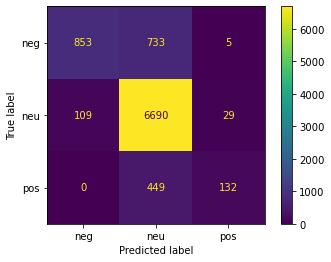

In [21]:
#confusion matrix 
ConfusionMatrixDisplay.from_predictions(y_test, SVC_pred)

In [22]:
#Printing the classification report to see all the values of the metrics
print('classification report')
print(classification_report(y_test,SVC_pred))

classification report
              precision    recall  f1-score   support

         neg       0.89      0.54      0.67      1591
         neu       0.85      0.98      0.91      6828
         pos       0.80      0.23      0.35       581

    accuracy                           0.85      9000
   macro avg       0.84      0.58      0.64      9000
weighted avg       0.85      0.85      0.83      9000



### Accuracy of the model got 85.277